Đã tìm thấy đường đi đến đích!
Độ dài đường đi: 86
Thời gian thực thi: 3.0392 giây


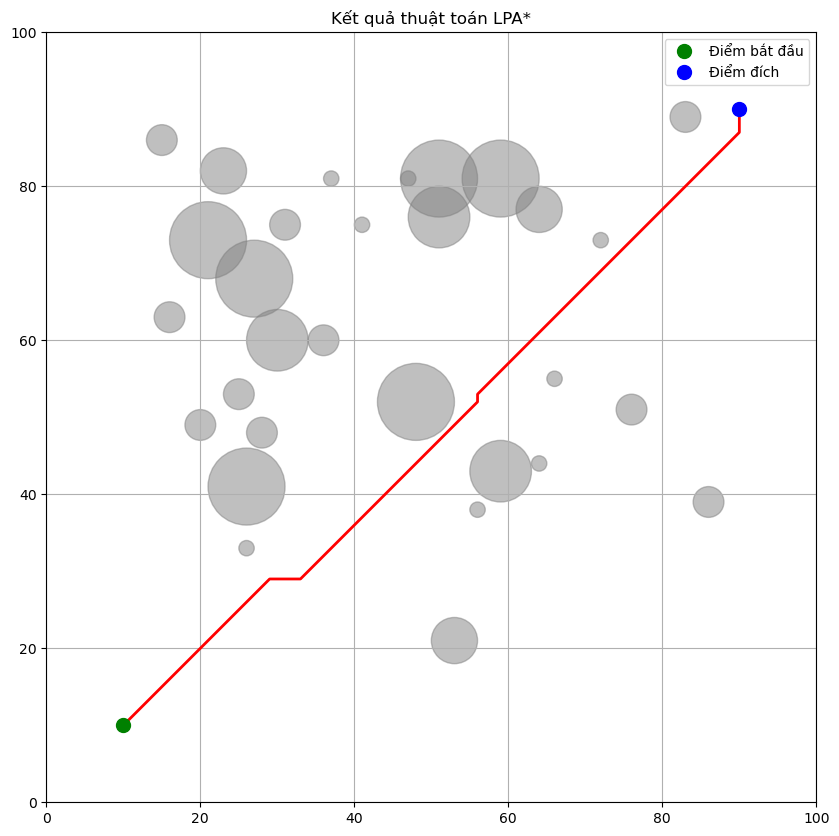

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
from queue import PriorityQueue

def create_obstacle(x, y, radius):
    return {"x": x, "y": y, "radius": radius}

def heuristic(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(state, obstacle):
    return math.sqrt((obstacle["x"] - state[0]) ** 2 + (obstacle["y"] - state[1]) ** 2) <= obstacle["radius"]

def get_neighbors(state, obstacles, max_coord=100):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = state[0] + dx, state[1] + dy
        if 0 <= x < max_coord and 0 <= y < max_coord:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def calculate_key(s, g, rhs, goal):
    return (min(g.get(s, float('inf')), rhs.get(s, float('inf'))) + heuristic(s, goal),
            min(g.get(s, float('inf')), rhs.get(s, float('inf'))))

def update_vertex(u, start, goal, g, rhs, U, obstacles):
    if u != start:
        rhs[u] = float('inf')
        for s in get_neighbors(u, obstacles):
            rhs[u] = min(rhs[u], g.get(s, float('inf')) + heuristic(s, u))

    if (calculate_key(u, g, rhs, goal), u) in U.queue:
        U.queue.remove((calculate_key(u, g, rhs, goal), u))

    if g.get(u, float('inf')) != rhs[u]:
        U.put((calculate_key(u, g, rhs, goal), u))

def compute_shortest_path(start, goal, g, rhs, U, obstacles):
    while not U.empty() and (U.queue[0][0] < calculate_key(goal, g, rhs, goal) or rhs.get(goal, float('inf')) != g.get(goal, float('inf'))):
        u = U.get()[1]
        k_old = calculate_key(u, g, rhs, goal)
        k_new = calculate_key(u, g, rhs, goal)

        if k_old < k_new:
            U.put((k_new, u))
        elif g.get(u, float('inf')) > rhs[u]:
            g[u] = rhs[u]
            for s in get_neighbors(u, obstacles):
                update_vertex(s, start, goal, g, rhs, U, obstacles)
        else:
            g[u] = float('inf')
            for s in get_neighbors(u, obstacles) + [u]:
                update_vertex(s, start, goal, g, rhs, U, obstacles)

def lpa_star(start, goal, obstacles):
    g = {}
    rhs = {start: 0}
    U = PriorityQueue()
    U.put((calculate_key(start, g, rhs, goal), start))

    compute_shortest_path(start, goal, g, rhs, U, obstacles)

    path = extract_path(start, goal, g, obstacles)
    return path

def extract_path(start, goal, g, obstacles):
    path = [goal]
    current = goal
    while current != start:
        neighbors = get_neighbors(current, obstacles)
        current = min(neighbors, key=lambda s: g.get(s, float('inf')) + heuristic(s, current))
        path.append(current)
    path.append(start)
    return path[::-1]

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')

    for obstacle in obstacles:
        circle = plt.Circle((obstacle["x"], obstacle["y"]), obstacle["radius"],
                            fill=True, color='gray', alpha=0.5)
        ax.add_artist(circle)

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán LPA*')
    plt.grid(True)
    
    # Lưu ảnh
    plt.savefig('pic4.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def main():
    obstacles = [create_obstacle(random.randint(11, 89), random.randint(11, 89), random.choice([1, 2, 3, 4, 5])) for _ in range(30)]
    start = (10, 10)
    goal = (90, 90)

    start_time = time.time()

    path = lpa_star(start, goal, obstacles)

    end_time = time.time()
    execution_time = end_time - start_time

    if path[-1] == goal:
        print("Đã tìm thấy đường đi đến đích!")
    else:
        print("Không tìm thấy đường đi đến đích.")
    print(f"Độ dài đường đi: {len(path)}")
    print(f"Thời gian thực thi: {execution_time:.4f} giây")

    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()

Số lần chạy: 1000
Tổng thời gian: 573.8235144615173 giây
Thời gian trung bình: 0.573823 giây
Độ lệch chuẩn thời gian: 0.043622 giây
Thời gian ngắn nhất: 0.459882 giây
Thời gian dài nhất: 0.828282 giây
Độ dài đường đi trung bình: 50.00


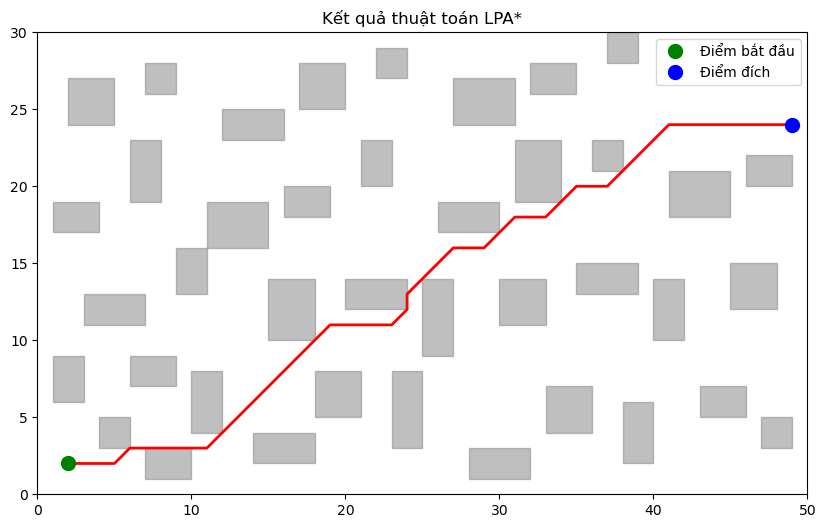

In [3]:
import random
import math
import time
import matplotlib.pyplot as plt
from queue import PriorityQueue
import statistics

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

def create_obstacles():
    return [
        ((4, 3), 2, 2), ((7, 1), 3, 2), ((1, 6), 2, 3), ((6, 7), 3, 2),
        ((10, 4), 2, 4), ((14, 2), 4, 2), ((18, 5), 3, 3), ((23, 3), 2, 5),
        ((28, 1), 4, 2), ((33, 4), 3, 3), ((38, 2), 2, 4), ((43, 5), 3, 2),
        ((47, 3), 2, 2), ((3, 11), 4, 2), ((9, 13), 2, 3), ((15, 10), 3, 4),
        ((20, 12), 4, 2), ((25, 9), 2, 5), ((30, 11), 3, 3), ((35, 13), 4, 2),
        ((40, 10), 2, 4), ((45, 12), 3, 3), ((1, 17), 3, 2), ((6, 19), 2, 4),
        ((11, 16), 4, 3), ((16, 18), 3, 2), ((21, 20), 2, 3), ((26, 17), 4, 2),
        ((31, 19), 3, 4), ((36, 21), 2, 2), ((41, 18), 4, 3), ((46, 20), 3, 2),
        ((2, 24), 3, 3), ((7, 26), 2, 2), ((12, 23), 4, 2), ((17, 25), 3, 3),
        ((22, 27), 2, 2), ((27, 24), 4, 3), ((32, 26), 3, 2), ((37, 28), 2, 2)
    ]

def heuristic(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(state, obstacle):
    x, y = state
    ox, oy = obstacle[0]
    ow, oh = obstacle[1], obstacle[2]
    return ox <= x < ox + ow and oy <= y < oy + oh

def get_neighbors(state, obstacles):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = state[0] + dx, state[1] + dy
        if 0 <= x < WIDTH and 0 <= y < HEIGHT:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def calculate_key(s, g, rhs, goal):
    return (min(g.get(s, float('inf')), rhs.get(s, float('inf'))) + heuristic(s, goal),
            min(g.get(s, float('inf')), rhs.get(s, float('inf'))))

def update_vertex(u, start, goal, g, rhs, U, obstacles):
    if u != start:
        rhs[u] = float('inf')
        for s in get_neighbors(u, obstacles):
            rhs[u] = min(rhs[u], g.get(s, float('inf')) + heuristic(s, u))

    if (calculate_key(u, g, rhs, goal), u) in U.queue:
        U.queue.remove((calculate_key(u, g, rhs, goal), u))

    if g.get(u, float('inf')) != rhs[u]:
        U.put((calculate_key(u, g, rhs, goal), u))

def compute_shortest_path(start, goal, g, rhs, U, obstacles):
    while not U.empty() and (U.queue[0][0] < calculate_key(goal, g, rhs, goal) or rhs.get(goal, float('inf')) != g.get(goal, float('inf'))):
        u = U.get()[1]
        k_old = calculate_key(u, g, rhs, goal)
        k_new = calculate_key(u, g, rhs, goal)

        if k_old < k_new:
            U.put((k_new, u))
        elif g.get(u, float('inf')) > rhs[u]:
            g[u] = rhs[u]
            for s in get_neighbors(u, obstacles):
                update_vertex(s, start, goal, g, rhs, U, obstacles)
        else:
            g[u] = float('inf')
            for s in get_neighbors(u, obstacles) + [u]:
                update_vertex(s, start, goal, g, rhs, U, obstacles)

def lpa_star(start, goal, obstacles):
    g = {}
    rhs = {start: 0}
    U = PriorityQueue()
    U.put((calculate_key(start, g, rhs, goal), start))

    compute_shortest_path(start, goal, g, rhs, U, obstacles)

    path = extract_path(start, goal, g, obstacles)
    return path

def extract_path(start, goal, g, obstacles):
    path = [goal]
    current = goal
    while current != start:
        neighbors = get_neighbors(current, obstacles)
        current = min(neighbors, key=lambda s: g.get(s, float('inf')) + heuristic(s, current))
        path.append(current)
    path.append(start)
    return path[::-1]

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    for obstacle in obstacles:
        rect = plt.Rectangle(obstacle[0], obstacle[1], obstacle[2], fill=True, color='gray', alpha=0.5)
        ax.add_patch(rect)

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán LPA*')

    plt.savefig('pic4-4.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def run_single_iteration(start, goal, obstacles):
    start_time = time.time()
    path = lpa_star(start, goal, obstacles)
    end_time = time.time()
    execution_time = end_time - start_time
    return path, execution_time

def main():
    obstacles = create_obstacles()
    start = START
    goal = GOAL
    total_start = time.time()
    iterations = 1000
    execution_times = []
    path_lengths = []

    for _ in range(iterations):
        path, execution_time = run_single_iteration(start, goal, obstacles)
        execution_times.append(execution_time)
        path_lengths.append(len(path))
    total_end = time.time()
    
    # Tính toán và in kết quả
    avg_time = statistics.mean(execution_times)
    std_dev_time = statistics.stdev(execution_times)
    min_time = min(execution_times)
    max_time = max(execution_times)
    avg_path_length = statistics.mean(path_lengths)
    total_time = total_end - total_start

    print(f"Số lần chạy: {iterations}")
    print(f"Tổng thời gian: {total_time} giây")
    print(f"Thời gian trung bình: {avg_time:.6f} giây")
    print(f"Độ lệch chuẩn thời gian: {std_dev_time:.6f} giây")
    print(f"Thời gian ngắn nhất: {min_time:.6f} giây")
    print(f"Thời gian dài nhất: {max_time:.6f} giây")
    print(f"Độ dài đường đi trung bình: {avg_path_length:.2f}")

    # Vẽ kết quả cho lần chạy cuối cùng
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()